## Regression Assumptions

1. Linearity
2. No endogeneity
3. Normality and homoscedasticity
4. No autocorrelation
5. No multicollinearity

In [ ]:
%load_ext lab_black

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

sns.set()
# plt.style.use("dark_background")
# sns.set_style("darkgrid")

### 1. Linearity

To check linearity, pick an independent variable (x) and plot it against the dependent variable (y) on a scatter plot. If data points form a pattern that looks like a straight line, then a linear regression model is suitable.

In [82]:
data = pd.read_csv("reference/S3_L25/real_estate_price_size_year.csv")
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


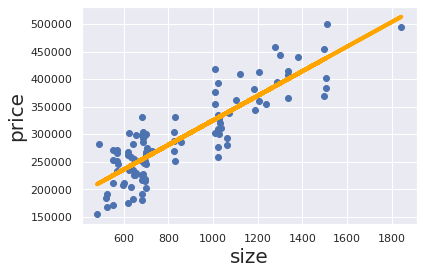

In [83]:
dependent = "price"
independent = "size"
plt.scatter(data[independent], data[dependent])
plt.xlabel(independent, fontsize=20)
plt.ylabel(dependent, fontsize=20)

m, b = np.polyfit(data[independent], data[dependent], 1)
yhat = m * data[independent] + b
plt.plot(data[independent], yhat, lw=4, c="orange", label="regression line")

plt.show()

Fixes for violations:
* Run a non-linear regression
* Exponential transformation
* Log transformation

### 2. No Endogeneity of Regressors

Omitted variable vias occurs when you forget to include a relevant variable. This is reflected in the error term as the factor you forgot about is included in the error. In this way, the error is not random but includes a systematic part (the omitted variable).

### 3. Normality and homoscedasticity

* Normality
* Zero Mean
* Homoscedasticity

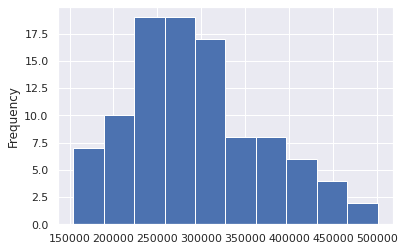

In [84]:
data["price"].plot.hist()

Tips on preventing heteroscedasticity:    
* Look for omitted variable bias
* Remove outliers
* Log transformation

### 4. No autocorrelation

Autocorrelation detection    
* Plot all residuals - If there are no patterns to be seen => no autocorrelation
* Durbin-Watson value - Falls between 0 and 4 (2-> no autocorrelation; <1 and >3 cause an alarm)

When error terms are autocorrelated, don't use the linear model. 

Alternatives:    
* Autoregressive model
* Moving avergae model
* Autoregressive moving average model
* Autoregressive integrated moving average model

### 5. No multicollinearity

Fixes    
1. Drop one of the two variables    
2. Transform them into one (e.g. average price)    


Prevention    
Find the correlation between each two pairs of independent variables.

[Text(0.5, 0, 'size'), Text(1.5, 0, 'year')]

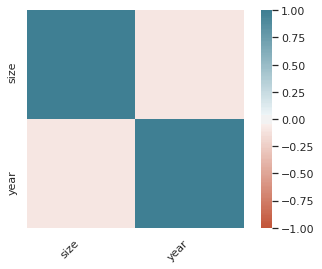

In [85]:
corr = data[["size", "year"]].corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")